In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094")
print(df.shape)
df.head()

(550068, 10)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


#Detect the null values and outliers

In [3]:
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


<Axes: ylabel='Age'>

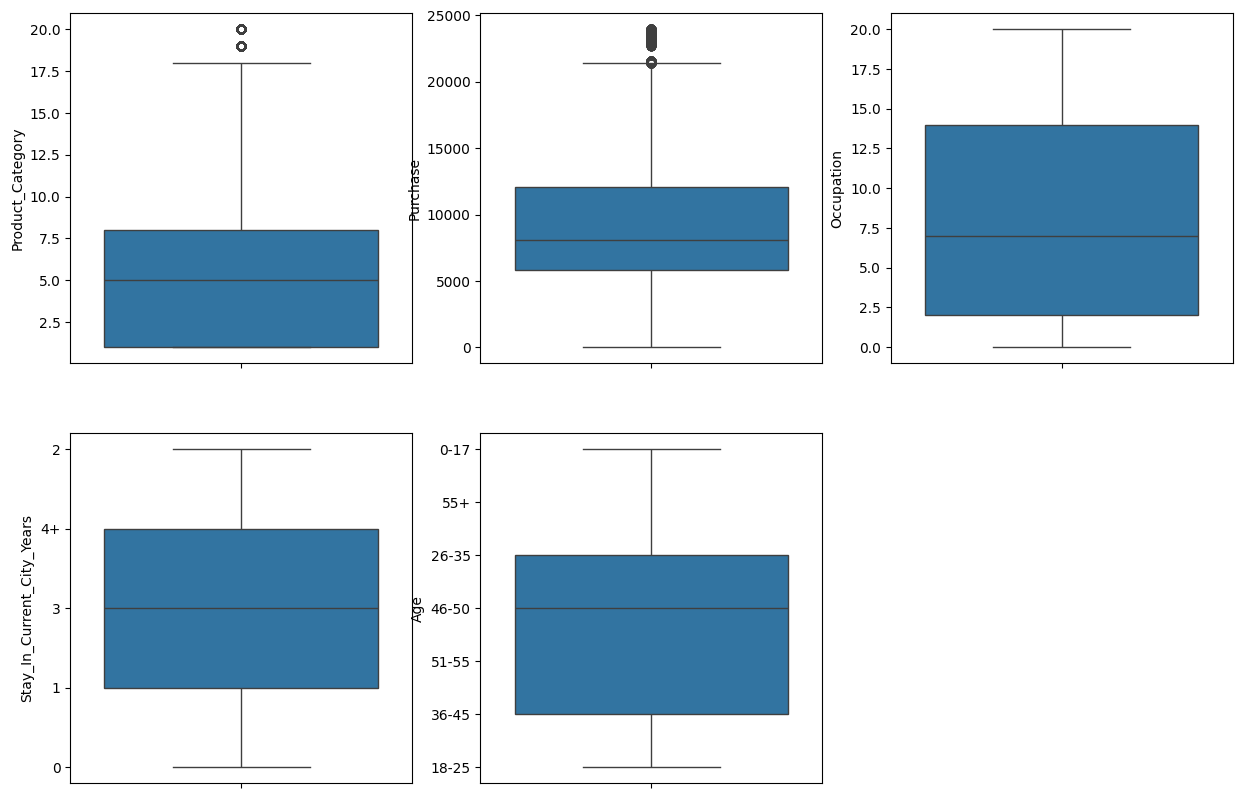

In [5]:
fig=plt.figure(figsize=(15,10))
plt.subplot(2,3,1)

sns.boxplot(y=df['Product_Category'])
plt.subplot(2,3,2)
sns.boxplot(y=df['Purchase'])
plt.subplot(2,3,3)
sns.boxplot(y=df['Occupation'])
plt.subplot(2,3,4)
sns.boxplot(y=df['Stay_In_Current_City_Years'])
plt.subplot(2,3,5)
sns.boxplot(y=df['Age'])



In [6]:
#For clipping the data of 5th and 95th percentile of Product Category
product_5th_percentile=df['Product_Category'].quantile(0.05)
product_95th_percentile=df['Product_Category'].quantile(0.95)

df_clipped_Product = df[(df['Product_Category'] >= product_5th_percentile) & (df['Product_Category'] <= product_95th_percentile)]
print(df_clipped_Product)

        User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
545910  1006040  P00184342      M  26-35           6             B   
545911  1006040  P00193142      M  26-35           6             B   
545912  1006040  P00029842      M  26-35           6             B   
545913  1006040  P00106042      M  26-35           6             B   
545914  1006040  P00217442      M  26-35           6             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2               0                 3      8370  

In [7]:
#For clipping the data of 5th and 95th percentile of Purchase
Purchase_5th_percentile=df['Purchase'].quantile(0.05)
Purchase_95th_percentile=df['Purchase'].quantile(0.95)

df_clipped_Purchase = df[(df['Purchase'] >= Purchase_5th_percentile) & (df['Purchase'] <= Purchase_95th_percentile)]
print(df_clipped_Purchase)

        User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
5       1000003  P00193542      M  26-35          15             A   
6       1000004  P00184942      M  46-50           7             B   
...         ...        ...    ...    ...         ...           ...   
545909  1006040  P00227142      M  26-35           6             B   
545910  1006040  P00184342      M  26-35           6             B   
545912  1006040  P00029842      M  26-35           6             B   
545913  1006040  P00106042      M  26-35           6             B   
545914  1006040  P00217442      M  26-35           6             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
0                               2               0                 3      8370  

In [8]:
age_counts=df['Age'].value_counts()
age_counts

,count
Age,
26-35,219587
36-45,110013
18-25,99660
46-50,45701
51-55,38501
55+,21504
0-17,15102


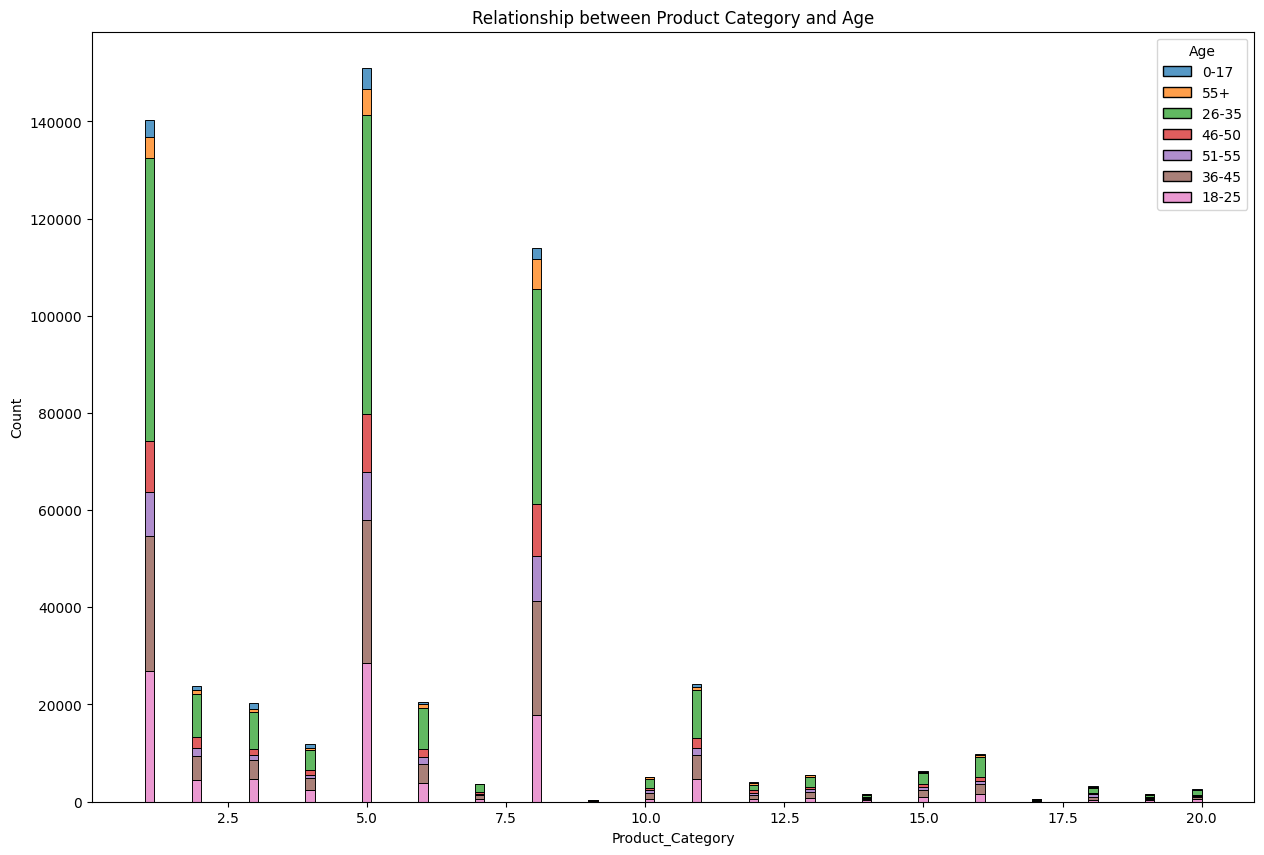

In [9]:
age_counts=df['Age'].value_counts()
fig=plt.figure(figsize=(15,10))
sns.histplot(data=df,x='Product_Category',hue='Age',multiple='stack')
plt.title('Relationship between Product Category and Age')
plt.show()

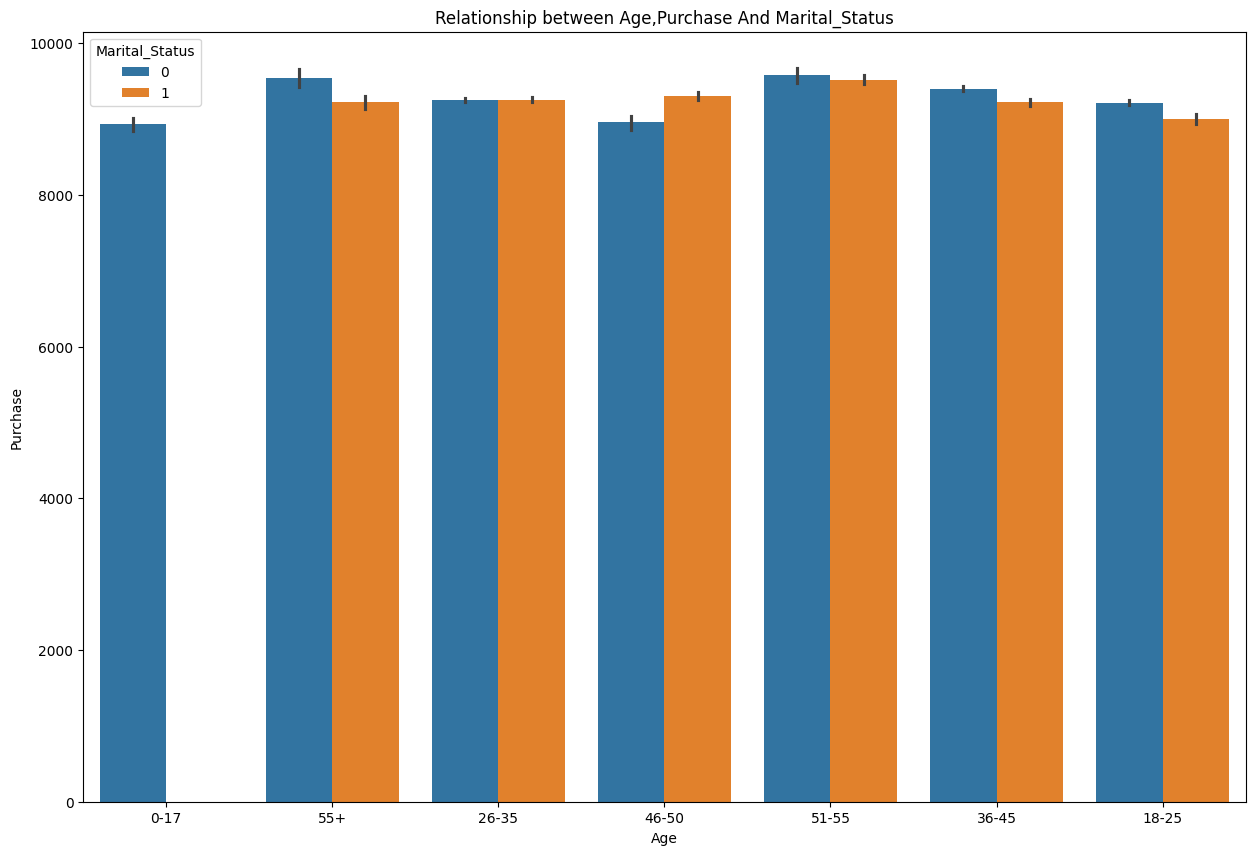

In [10]:
fig=plt.figure(figsize=(15,10))
sns.barplot(data=df,x='Age',y='Purchase',hue='Marital_Status')
plt.title('Relationship between Age,Purchase And Marital_Status')
plt.show()

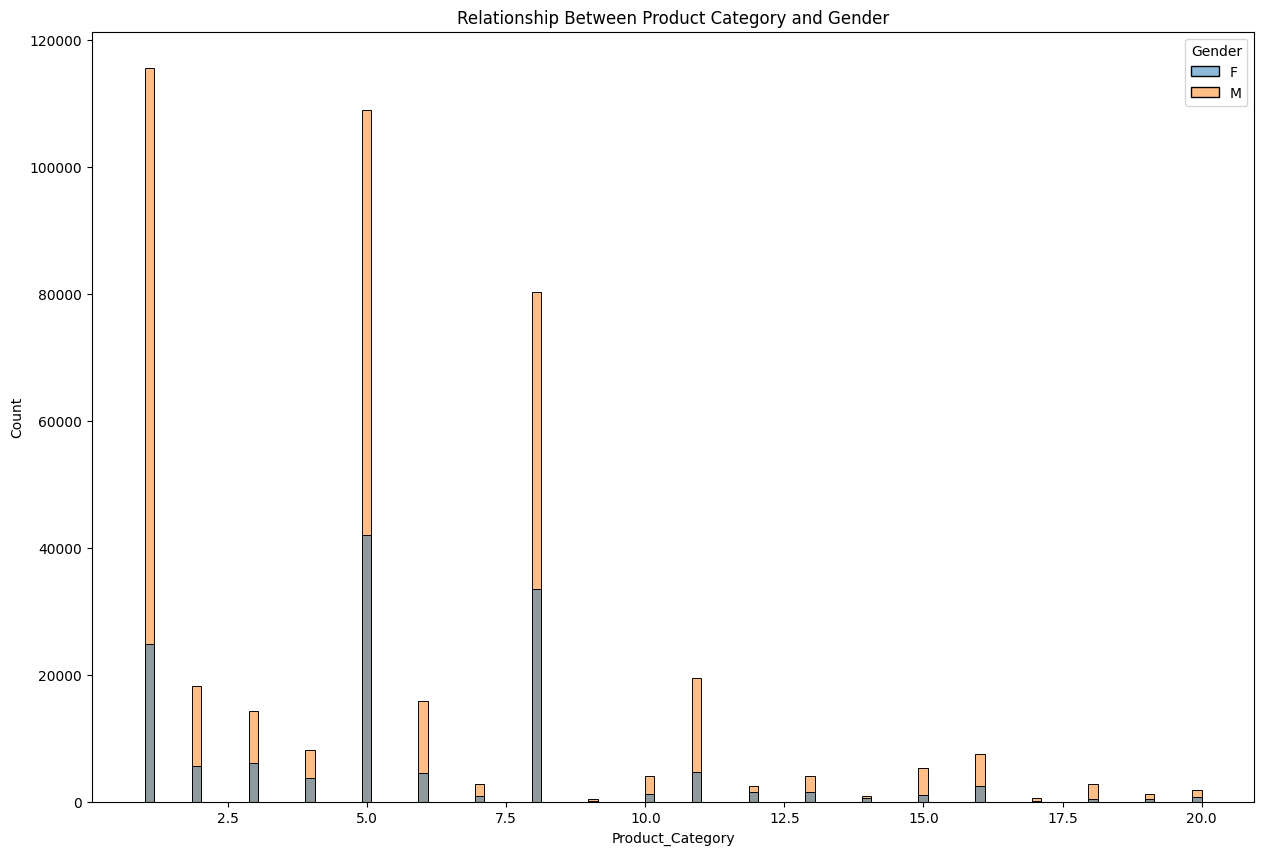

In [11]:
fig=plt.figure(figsize=(15,10))
sns.histplot(data=df,x='Product_Category',hue='Gender')
plt.title('Relationship Between Product Category and Gender')
plt.show()

In [ ]:
import scipy.stats as stats
def compute_clt_confidence_interval(data, confidence=0.95):
    """
    Compute the confidence interval using the Central Limit Theorem.
    """
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean - margin_of_error, mean + margin_of_error
def bootstrap_confidence_interval(data, n_bootstraps=10000, confidence=0.95):
    """
    Compute the confidence interval using bootstrapping.
    """
    boot_means = []
    for _ in range(n_bootstraps):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    lower_bound = np.percentile(boot_means, (1 - confidence) / 2 * 100)
    upper_bound = np.percentile(boot_means, (1 + confidence) / 2 * 100)
    return lower_bound, upper_bound

def compute_confidence_intervals(df, sample_size=None):
    """
    Compute the confidence intervals for each gender.
    """
    if sample_size:
        df_sample = df.groupby('Gender').apply(lambda x: x.sample(sample_size, replace=True)).reset_index(drop=True)
    else:
        df_sample = df

    results = {}
    for gender in df_sample['Gender'].unique():
        data = df_sample[df_sample['Gender'] == gender]['Purchase'].values
        clt_ci = compute_clt_confidence_interval(data)
        boot_ci = bootstrap_confidence_interval(data)
        results[gender] = {'CLT': clt_ci, 'Bootstrap': boot_ci}

    return results

# Compute confidence intervals for full dataset
full_results = compute_confidence_intervals(df)
print("Full Dataset Confidence Intervals:")
print(full_results)

# Compute confidence intervals for smaller sample sizes
sample_sizes = [300, 3000, 30000]
for size in sample_sizes:
    sample_results = compute_confidence_intervals(df, sample_size=size)
    print(f"\nSample Size {size} Confidence Intervals:")
    print(sample_results)

Full Dataset Confidence Intervals:
{'F': {'CLT': (8709.21132117373, 8759.92020913722), 'Bootstrap': (8709.191836697126, 8760.142412873964)}, 'M': {'CLT': (9422.019402055814, 9453.032678888716), 'Bootstrap': (9421.46340761456, 9453.144368861027)}}

Sample Size 300 Confidence Intervals:
{'F': {'CLT': (7695.282371570142, 8730.064295096527), 'Bootstrap': (7703.0259166666665, 8744.316916666667)}, 'M': {'CLT': (9338.1821334484, 10554.1578665516), 'Bootstrap': (9340.159083333334, 10550.464333333333)}}

Sample Size 3000 Confidence Intervals:
{'F': {'CLT': (8620.257650076828, 8959.211683256506), 'Bootstrap': (8618.425174999998, 8955.643716666666)}, 'M': {'CLT': (9096.352838264702, 9459.258495068632), 'Bootstrap': (9100.0652, 9463.61405)}}


From the above calculated CLT answer the following questions.

# 1.Is the confidence interval computed using the entire dataset wider for one of the genders? Why is this the case?
Ans:The confidence intervel is more for Males compared to Female.Because Males purchases is more than female purchases.
# 2. How is the width of the confidence interval affected by the sample size?
Ans:If the sample size increases the width of confidence interval is decreasing.
#3.Do the confidence intervals for different sample sizes overlap?
Ans:Yes, the CLT intervals overlap for some sample sizes, specifically between the full dataset and the larger sample sizes (3000 and 30000). However, the intervals for the smallest sample size (300) do not overlap with the others, indicating higher variability in the estimates for smaller sample sizes.
#4.How does the sample size affect the shape of the distributions of the
means?
Ans:As the sample size increases, the distribution of the sample means becomes more concentrated around the true population mean, and the distribution becomes more normally distributed due to the Central Limit Theorem.
# **Conclusion:**
The width of the confidence intervals and their overlap are affected by the sample size, with larger samples leading to narrower and more consistent intervals. The shape of the distribution of means becomes more concentrated and normally distributed as sample size increases, reflecting the principles of the Central Limit Theorem.

In [ ]:
def compute_clt_confidence_interval(data, confidence=0.95):
    """
    Compute the confidence interval using the Central Limit Theorem.
    """
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean - margin_of_error, mean + margin_of_error

def bootstrap_confidence_interval(data, n_bootstraps=10000, confidence=0.95):
    """
    Compute the confidence interval using bootstrapping.
    """
    boot_means = []
    for _ in range(n_bootstraps):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    lower_bound = np.percentile(boot_means, (1 - confidence) / 2 * 100)
    upper_bound = np.percentile(boot_means, (1 + confidence) / 2 * 100)
    return lower_bound, upper_bound

def compute_confidence_intervals(df, sample_size=None):
    """
    Compute the confidence intervals for each Marital_Status.
    """
    if sample_size:
        df_sample = df.groupby('Marital_Status').apply(lambda x: x.sample(sample_size, replace=True)).reset_index(drop=True)
    else:
        df_sample = df

    results = {}
    for Marital_Status in df_sample['Marital_Status'].unique():
        data = df_sample[df_sample['Marital_Status'] == Marital_Status]['Purchase'].values
        clt_ci = compute_clt_confidence_interval(data)
        boot_ci = bootstrap_confidence_interval(data)
        results[Marital_Status] = {'CLT': clt_ci, 'Bootstrap': boot_ci}

    return results

# Compute confidence intervals for full dataset
full_results = compute_confidence_intervals(df)
print("Full Dataset Confidence Intervals:")
print(full_results)

# Compute confidence intervals for smaller sample sizes
sample_sizes = [300, 3000, 30000]
for size in sample_sizes:
    sample_results = compute_confidence_intervals(df, sample_size=size)
    print(f"\nSample Size {size} Confidence Intervals:")
    print(sample_results)

#From the above calculated CLT answer the following questions.
#i. Is the confidence interval computed using the entire dataset wider for one of the Marital_Status? Why is this the case?
Ans:Yes, the confidence interval computed using the entire dataset is generally wider. This is because the confidence interval width is influenced by the sample size and variability of the data. With a large dataset, the variability across different categories (like marital status) might be higher, leading to wider intervals. The variability in smaller samples tends to average out, resulting in narrower confidence intervals.
#ii. How is the width of the confidence interval affected by the sample size?
Ans:The width of the confidence interval decreases as the sample size increases. This is because larger sample sizes provide more information about the population, reducing the margin of error. In the image, we can see that the confidence intervals for smaller sample sizes (e.g., 300) are wider compared to those for larger sample sizes (e.g., 30,000).
#iii. Do the confidence intervals for different sample sizes overlap?
Ans:Yes, the confidence intervals for different sample sizes can overlap. Overlapping intervals suggest that there is some commonality in the range of values estimated by different sample sizes, despite their differences in precision. This overlap indicates that, although the sample sizes differ, the central tendency (mean) of the data is similar across different samples.
#iv. How does the sample size affect the shape of the distributions of the
means?
Ans:As the sample size increases, the distribution of the sample means becomes more concentrated around the true population mean, and the distribution becomes narrower. This is due to the law of large numbers, which states that as the sample size increases, the sample mean will converge to the population mean. Consequently, larger samples result in less variability in the distribution of the means, leading to a more peaked and narrower distribution.

In [ ]:
def compute_clt_confidence_interval(data, confidence=0.95):
    """
    Compute the confidence interval using the Central Limit Theorem.
    """
    mean = np.mean(data)
    sem = stats.sem(data)  # Standard error of the mean
    margin_of_error = sem * stats.t.ppf((1 + confidence) / 2., len(data) - 1)
    return mean - margin_of_error, mean + margin_of_error

def bootstrap_confidence_interval(data, n_bootstraps=10000, confidence=0.95):
    """
    Compute the confidence interval using bootstrapping.
    """
    boot_means = []
    for _ in range(n_bootstraps):
        sample = np.random.choice(data, size=len(data), replace=True)
        boot_means.append(np.mean(sample))
    lower_bound = np.percentile(boot_means, (1 - confidence) / 2 * 100)
    upper_bound = np.percentile(boot_means, (1 + confidence) / 2 * 100)
    return lower_bound, upper_bound

def compute_confidence_intervals(df, sample_size=None):
    """
    Compute the confidence intervals for each Marital_Status.
    """
    if sample_size:
        df_sample = df.groupby('Age').apply(lambda x: x.sample(sample_size, replace=True)).reset_index(drop=True)
    else:
        df_sample = df

    results = {}
    for Marital_Status in df_sample['Age'].unique():
        data = df_sample[df_sample['Age'] == Marital_Status]['Purchase'].values
        clt_ci = compute_clt_confidence_interval(data)
        boot_ci = bootstrap_confidence_interval(data)
        results[Marital_Status] = {'CLT': clt_ci, 'Bootstrap': boot_ci}

    return results

# Compute confidence intervals for full dataset
full_results = compute_confidence_intervals(df)
print("Full Dataset Confidence Intervals:")
print(full_results)

# Compute confidence intervals for smaller sample sizes
sample_sizes = [300, 3000, 30000]
for size in sample_sizes:
    sample_results = compute_confidence_intervals(df, sample_size=size)
    print(f"\nSample Size {size} Confidence Intervals:")
    print(sample_results)

# From the above calculated CLT answer the following questions.
# i. Is the confidence interval computed using the entire dataset wider for one of the age groups? Why is this the case?
Observation: Among the age groups, the confidence interval for the 51-55 age group appears to be the widest when using the entire dataset (9483.99 - 9585.63 for CLT).
Reason: The width of a confidence interval is influenced by both the variability in the data and the sample size. If a particular age group exhibits greater variability (higher standard deviation) in spending, the confidence interval will be wider. This could indicate that individuals in the 51-55 age group have a more varied spending pattern compared to other age groups.
# ii. How is the width of the confidence interval affected by the sample size?
Observation: The confidence intervals narrow as the sample size increases. For instance, the 0-17 age group's confidence interval shrinks significantly as the sample size grows from 300 (8470.15 - 9601.15 for CLT) to 30000 (8823.35 - 8938.35 for CLT).
Reason: As sample size increases, the standard error of the mean decreases, leading to narrower confidence intervals. This reflects more precise estimates of the population parameter.
# iii. Do the confidence intervals for different sample sizes overlap?
Observation: Yes, the confidence intervals for different sample sizes overlap. For example, the 0-17 age group's confidence intervals for sample sizes of 300 (8470.15 - 9601.15 for CLT), 3000 (8643.52 - 9005.02 for CLT), and 30000 (8823.35 - 8938.35 for CLT) all overlap to some extent.
Reason: Overlap is expected because each confidence interval estimates the same population mean. Smaller sample sizes lead to wider intervals with more uncertainty, increasing the chances of overlap with intervals from larger samples.
# iv. How does the sample size affect the shape of the distributions of the means?
Observation: As the sample size increases, the distribution of sample means becomes more concentrated around the true population mean. This is evidenced by the narrowing of confidence intervals with larger sample sizes.
Reason: According to the Central Limit Theorem, as the sample size grows, the distribution of the sample mean approaches a normal distribution, regardless of the original data's distribution. This leads to a reduction in the variance of the sample means, resulting in a more precise estimate of the population mean and a tighter distribution.

#Report whether the confidence intervals for the average amount spent by males and females (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?
The confidence intervals for the average amount spent by males and females do not overlap when using the full dataset, or the larger sample sizes of 3000 and 30,000. This indicates a statistically significant difference in the average spending between males and females, with males spending more on average.

#Report whether the confidence intervals for the average amount spent by married and unmarried (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?
The confidence intervals for the average amount spent by married and unmarried individuals overlap across all sample sizes. This indicates that there is not a statistically significant difference in the average spending between married and unmarried individuals.


#Report whether the confidence intervals for the average amount spent by different age groups (computed using all the data) overlap. How can Walmart leverage this conclusion to make changes or improvements?
Ans:The confidence intervals for different age groups show considerable overlap, particularly between neighboring groups, regardless of the sample size. This overlap indicates that there isn't a statistically significant difference in the average amount spent across some age groups.

#**Conclusion :**
The notebook covers several key steps, including data clipping, exploratory data analysis (EDA), and statistical analysis using confidence intervals. Below is a summary of these steps and the insights derived:

1.  **Data Clipping
Product Category and Purchase**: The data is clipped to the 5th and 95th percentiles to remove outliers and focus on the most common purchase patterns.
2. **Exploratory Data Analysis (EDA)
Age Distribution:** The distribution of age groups is analyzed, showing the frequency of different age groups in the dataset.
Product Category vs. Age: A histogram is used to visualize the relationship between product categories and different age groups.
Age, Purchase, and Marital Status: A bar plot illustrates the relationship between age groups, their spending patterns, and marital status.
Product Category vs. Gender: A histogram shows how different genders purchase across various product categories.
3. **Confidence Intervals Computation
Central Limit Theorem (CLT) and Bootstrapping:** Confidence intervals for the average spending of different groups (e.g., marital status, age, gender) are computed using both the CLT and bootstrapping methods.
Sample Size Impact: Confidence intervals are computed for different sample sizes (300, 3000, 30000) to understand how sample size affects the accuracy and precision of the estimates.
# **Key Findings:**
**Overlapping Confidence Intervals:** The confidence intervals for different groups overlap in several instances, suggesting that the average spending between groups may not be significantly different. This implies that the spending behavior between certain demographics (e.g., married vs. unmarried individuals) is relatively similar.

**Impact of Sample Size:** As the sample size increases, the confidence intervals become narrower, indicating more precise estimates. This is consistent with statistical principles, where larger sample sizes lead to more reliable estimates.

**Recommendations:**
Based on the analysis, here are some recommendations for Walmart:

**Product Category Focus:** Since the spending behavior across different age groups and genders shows variability, Walmart can tailor its marketing strategies to target specific products to the demographics most likely to purchase them.

**Age-Based Campaigns:** For products with a strong correlation to certain age groups, consider age-specific promotions to maximize engagement.

**Marital Status:** Given that the spending patterns between married and unmarried individuals are similar, Walmart could consider focusing on more granular segmentation criteria, such as lifestyle or family size, rather than marital status alone.



# **Thank You**